In [2]:
from writereadfile import *
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [3]:
def draw_heatmap(data_x, data_y, data, city, max_value, title, percentage=True):    

    column_labels = data_x
    row_labels = data_y
    
    altura=len(data_x)
    #print(len(row_labels),len(column_labels))
    #fig = plt.figure()
    #fig.set_size_inches(18.5, 8.5)
    #ax = fig.add_subplot(111)
    #fig = plt.figure(figsize=(3,8))
    #ax = plt.subplot()
    #im = ax.imshow(arr, interpolation="none")
    #fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize=(14,8), linewidth=3, dpi=80)
    #heatmap = ax.pcolor(data, cmap=cm.coolwarm)
    for row in range(len(row_labels)):
        for colm in range(len(column_labels)):
            plt.text(colm, row, data[row][colm],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
    #ax.set_yticks(np.arange(len(column_labels))+0.5, minor=False)
    ax.set_xticks(np.arange(len(column_labels)), minor=False)
    ax.set_yticks(np.arange(len(row_labels)), minor=False)
    
    # Minor ticks
    ax.set_xticks(np.arange(-0.5,len(column_labels)), minor=True)
    ax.set_yticks(np.arange(-0.5,len(row_labels)), minor=True)
    
    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

    ax.set_xticklabels(column_labels, minor=False, fontsize=12)
    ax.set_yticklabels(row_labels, minor=False, fontsize=12)
    
    ax.set_title(title+city, fontsize=13)
    ax.set_xlabel('Months', fontsize=12.5)
    ax.set_ylabel('Categories', fontsize=12.5)
    
    #cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)  linewidths=.5
    #cax = ax.imshow(data, interpolation='nearest', cmap=cm.magma)
    #cax = ax.imshow(data, interpolation='nearest', cmap=cm.GnBu)
    #cax = ax.imshow(data, interpolation='nearest', cmap=cm.summer)
    #cax = ax.imshow(data, interpolation='nearest', cmap=cm.get_cmap('summer_r'))
    cax = ax.imshow(data, interpolation='nearest', cmap=cm.PuRd)
    ax.invert_yaxis()  ##ojo con esto
    
    #intervalo= int((max_value)/10)
    if percentage == True:
        cbar = fig.colorbar(cax, ticks=[x / 100.0  for x in range(0,max_value,10)])
        cbar.ax.set_yticklabels([x / 100.0 for x in range(0,max_value,10)], fontsize=11)  # vertically oriented colorbar
    else:
        cbar = fig.colorbar(cax, ticks=[x for x in range(0,max_value,10)])
        cbar.ax.set_yticklabels([x for x in range(0,max_value,10)], fontsize=11)  # vertically oriented colorbar
    
    #print(max_value, intervalo)
    
    #cbar = fig.colorbar(cax, ticks=[x for x in range(0,max_value+1)])
    
    name_plot='heatmaps/heatmap_'+city+'.png'
    #savefig(name_plot)
    #plt.savefig(name_plot)
    plt.axis("tight")
    plt.show() 

In [4]:
groups_forAnalysis=load_json('10Cities_groupsOneYear')

In [5]:
groups_forAnalysis.keys()

dict_keys(['Barcelona', 'Madrid', 'Buenos Aires', 'La Plata', 'Bogota', 'Medellin', 'Mexico City', 'Ecatepec', 'Lima', 'Santiago'])

In [6]:
groups_forAnalysis['Barcelona'].keys()

dict_keys(['Apr17', 'May17', 'Jun17', 'Jul17', 'Aug17', 'Sep17', 'Oct17', 'Nov17', 'Dec17', 'Jan18', 'Feb18', 'Mar18'])

In [7]:
groups_forAnalysis['Barcelona']['Apr17'][0]

{'category': {'id': 14,
  'name': 'health/wellbeing',
  'shortname': 'health-wellbeing'},
 'city': 'Barcelona',
 'country': 'ES',
 'created': 1491042415000,
 'description': '<p>Abierto a todas las edades.&nbsp;</p>\n<p><br>Practicamos yoga como un arte corporal sensible y profundo. Se liberan tensiones físicas y emocionales así que es un trabajo con fines terapéuticos y meditativos que fomenta la armonía y la unidad. Se practica desde la escucha y aceptación de lo que hay y solo por poner conciencia en las posibles tensiones de todo tipo se provoca una transmutación energética. Si se disuelven las tensiones, la respiración toma su curso natural. <br> Es una combinación de las pulsiones yin, como la escucha profunda, la sensibilidad, lo femenino y el yang, trabajar la resistencia y la fuerza, lo masculino. Tonicidad y flexibilidad en constante flujo. <br> Liberar stress, para refinar el cuerpo de tal manera que vibre armoniosamente.</p>',
 'id': 23085944,
 'join_mode': 'open',
 'lat': 4

In [8]:
categories_perCity=load_json('categories_perCity')

In [9]:
categories_perCity['Barcelona']['categories_perMonth'].keys()

dict_keys(['Apr17', 'May17', 'Jun17', 'Jul17', 'Aug17', 'Sep17', 'Oct17', 'Nov17', 'Dec17', 'Jan18', 'Feb18', 'Mar18'])

In [10]:
categories_perCity['Barcelona']['categories_perMonth']['Apr17']

[['health-wellbeing', 12],
 ['career-business', 11],
 ['language', 10],
 ['tech', 9],
 ['education-learning', 6],
 ['socializing', 6],
 ['food-drink', 6],
 ['arts-culture', 5],
 ['outdoors-adventure', 5],
 ['new-age-spirituality', 5],
 ['dancing', 3],
 ['fitness', 3],
 ['games', 2],
 ['writing', 2],
 ['photography', 2],
 ['music', 2],
 ['sports-recreation', 1],
 ['government-politics', 1],
 ['community-environment', 1],
 ['lifestyle', 1],
 ['hobbies-crafts', 1],
 ['parents-family', 1],
 ['lgbt', 1],
 ['movies-film', 1]]

In [12]:
cities=['Barcelona','Madrid','Buenos Aires','La Plata','Bogota','Medellin',
       'Mexico City','Lima','Santiago']

In [16]:
last_year=['Apr17','May17','Jun17','Jul17','Aug17','Sep17','Oct17','Nov17','Dec17','Jan18','Feb18','Mar18']

In [17]:
categ_names=['tech',
'career-business',
'health-wellbeing',
'language',
'new-age-spirituality',
'education-learning',
'arts-culture',
'outdoors-adventure',
'socializing',
'fitness',
'food-drink',
'sports-recreation',
'dancing',
'music',
'photography',
'games',
'movies-film',
'community-environment',
'hobbies-crafts',
'lgbt',
'parents-family',
'book-clubs',
'support',
'fashion-beauty',
'pets-animals',
'writing',
'government-politics',
'lifestyle',
'religion-beliefs',
'sci-fi-fantasy',
'cars-motorcycles',
'singles']

Barcelona


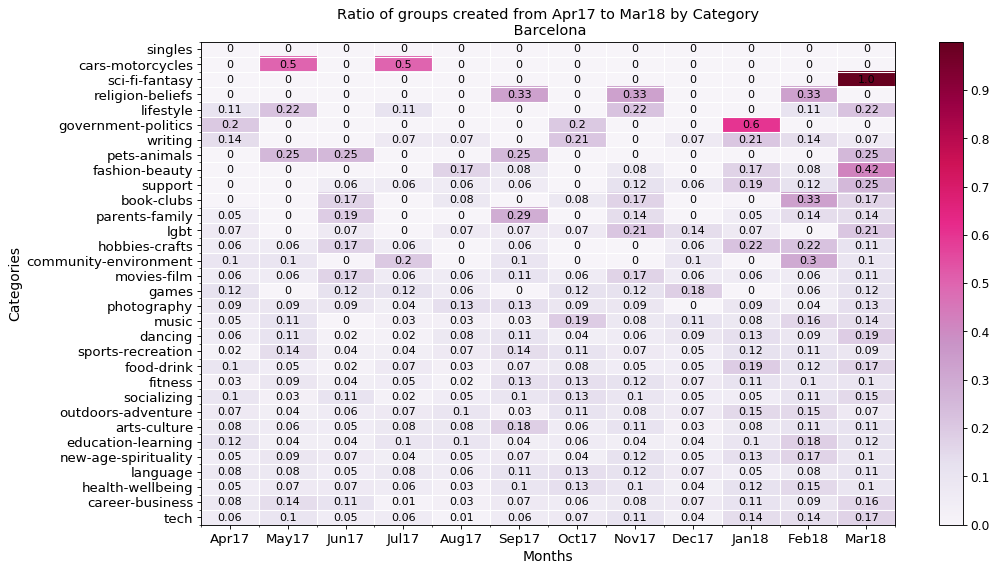

Madrid


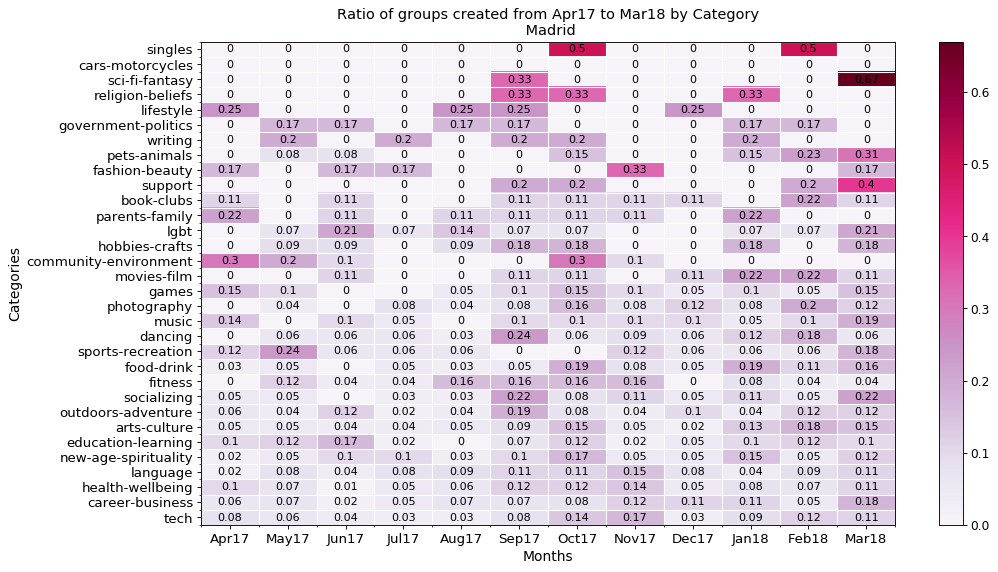

Buenos Aires


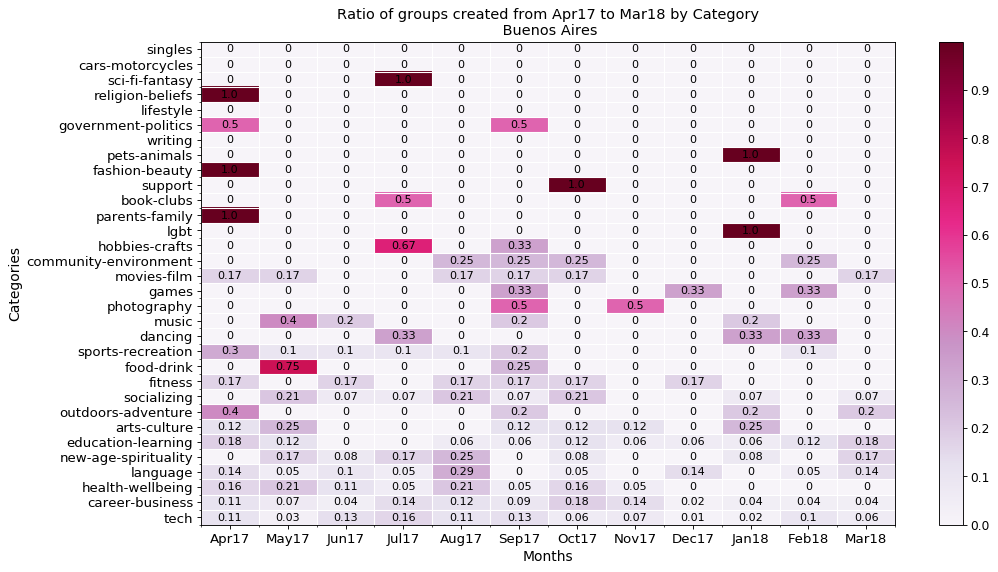

La Plata


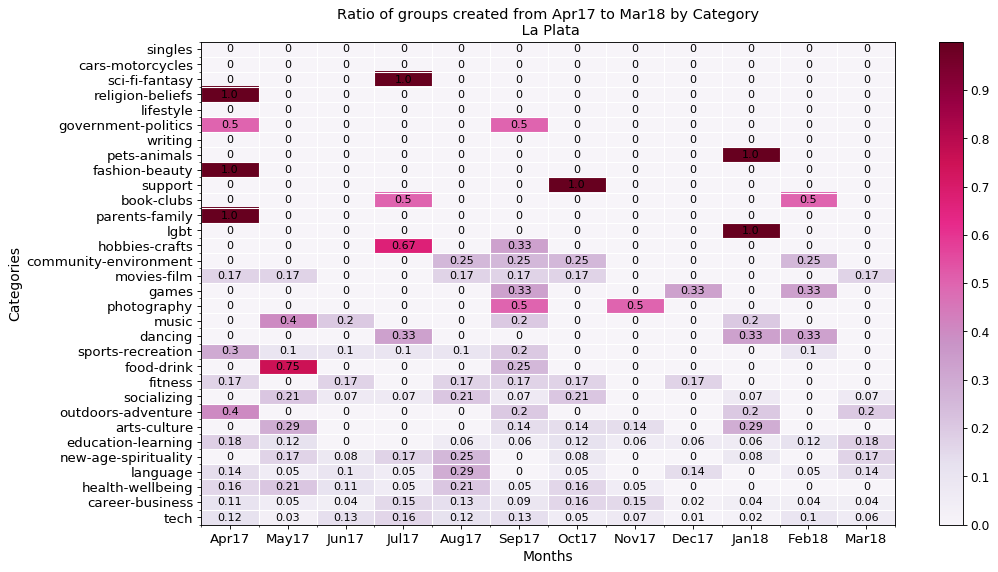

Bogota


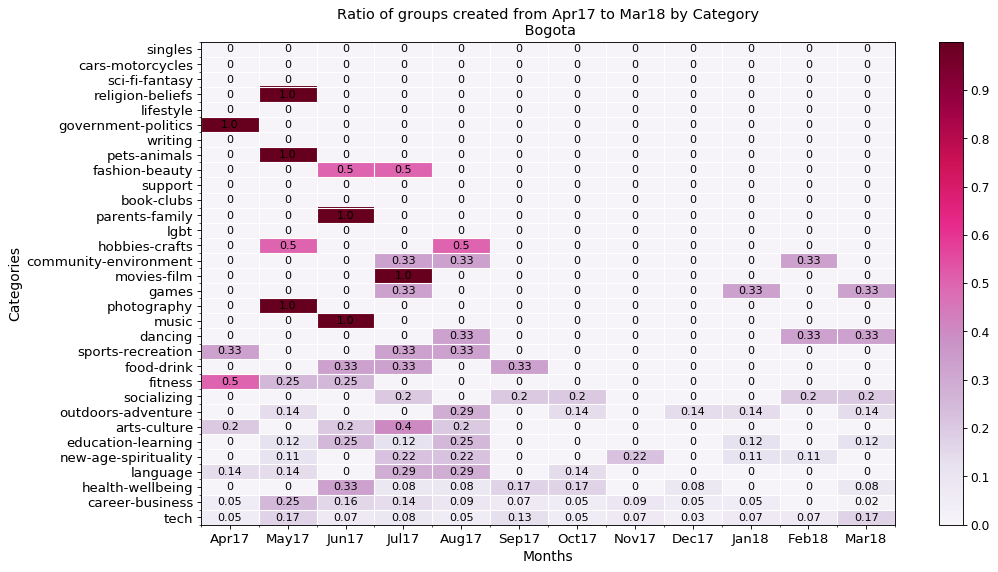

Medellin


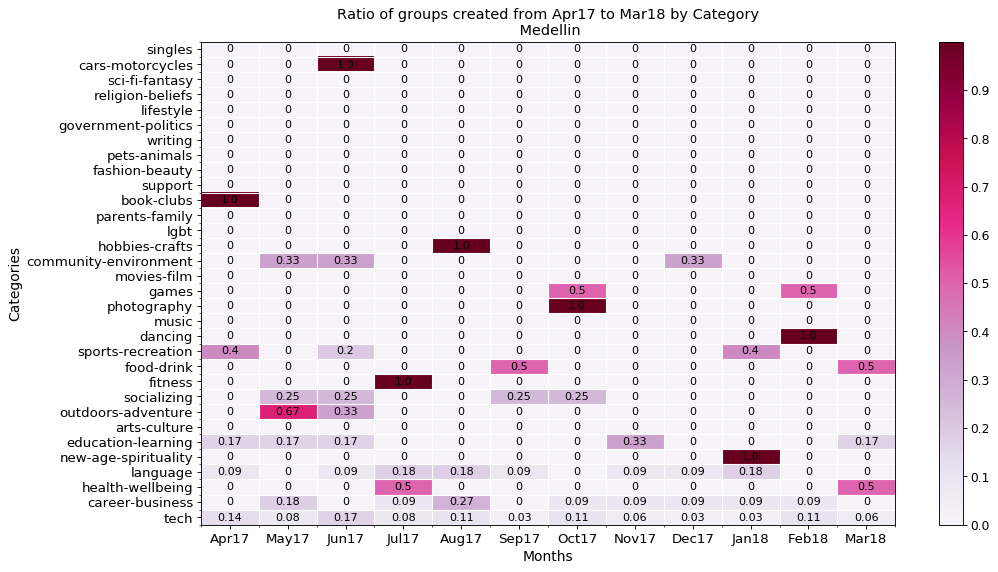

Mexico City


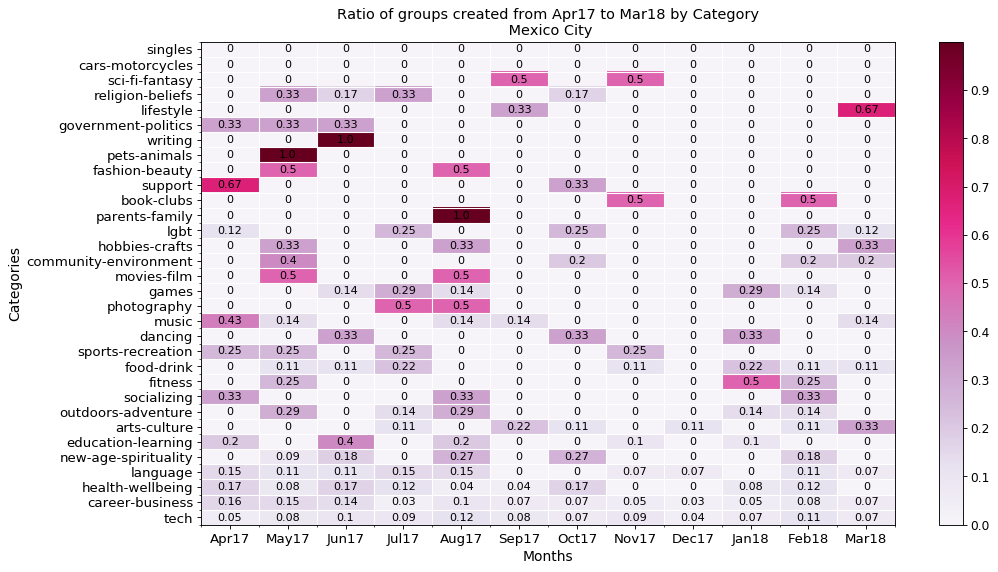

Lima


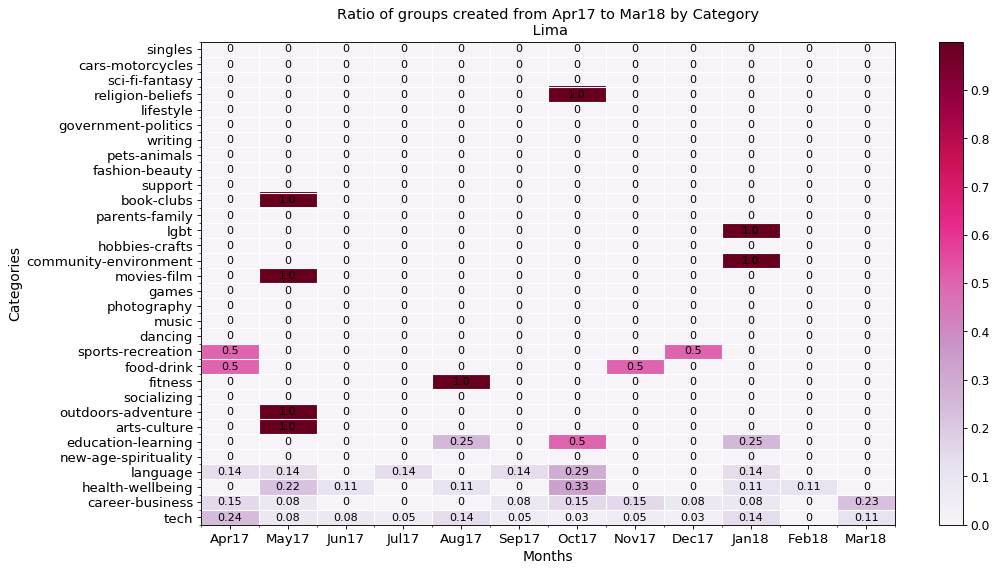

Santiago


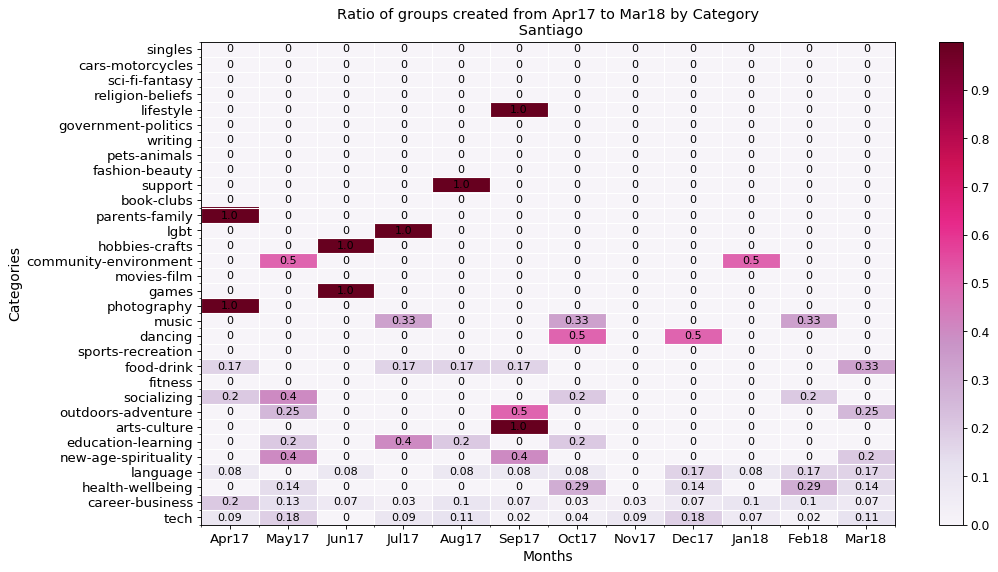

In [18]:
for c in cities:
    print(c)
    
    totalGroups_perCat={} ## to save the total number of groups in the given category in the city
    for cat in categ_names:
        freq_categ=sum([item[1] for month in last_year for item in categories_perCity[c]['categories_perMonth'][month]
                    if item[0]==cat])
        totalGroups_perCat[cat]=freq_categ  

    data_forHeatmap=[]
    toRows=[]
    for month in last_year:
        data_forHeatmap_col=[0 for _ in range(len(categ_names))]
        #totalGroups=sum([i[1]for i in categories_perCity[c]['categories_perMonth'][month]]) #the total groups considered in the month
        for item in categories_perCity[c]['categories_perMonth'][month]:
            #data_forHeatmap_col[categ_names.index(item[0])]=round(item[1]/totalGroups,2)
            data_forHeatmap_col[categ_names.index(item[0])]=round(item[1]/totalGroups_perCat[item[0]],2)
        toRows.append(data_forHeatmap_col)
    data_forHeatmap=[list(i) for i in zip(*toRows)]
    #print(data_forHeatmap)
    
    #draw_heatmap(column_labels, row_labeld, data_forHeatmap, nom_plot, max_value, title)
    draw_heatmap(last_year, categ_names, data_forHeatmap, c, 100, 'Ratio of groups created from Apr17 to Mar18 by Category\n ')

Barcelona
Madrid
Buenos Aires
La Plata
Bogota
Medellin
Mexico City
Lima
Santiago


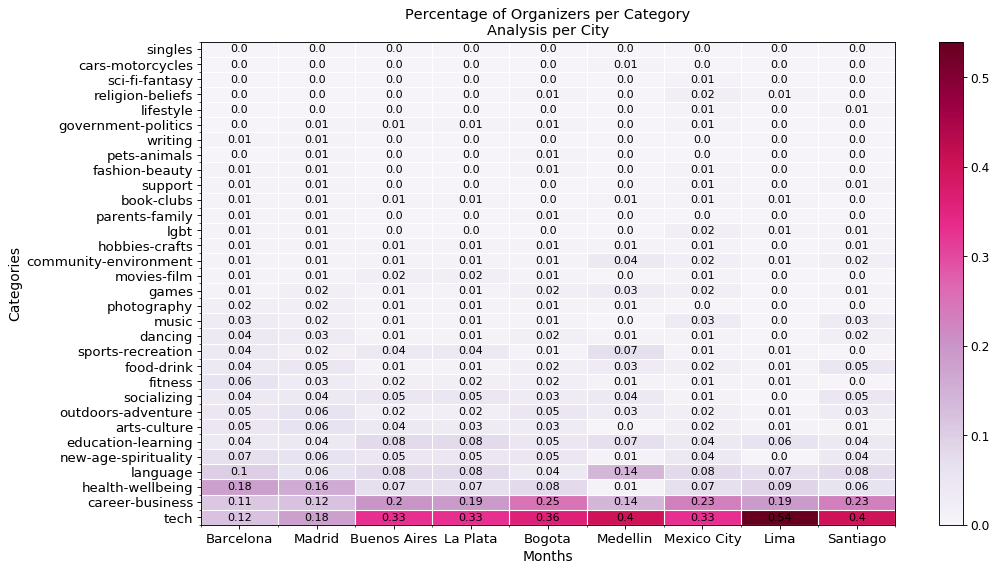

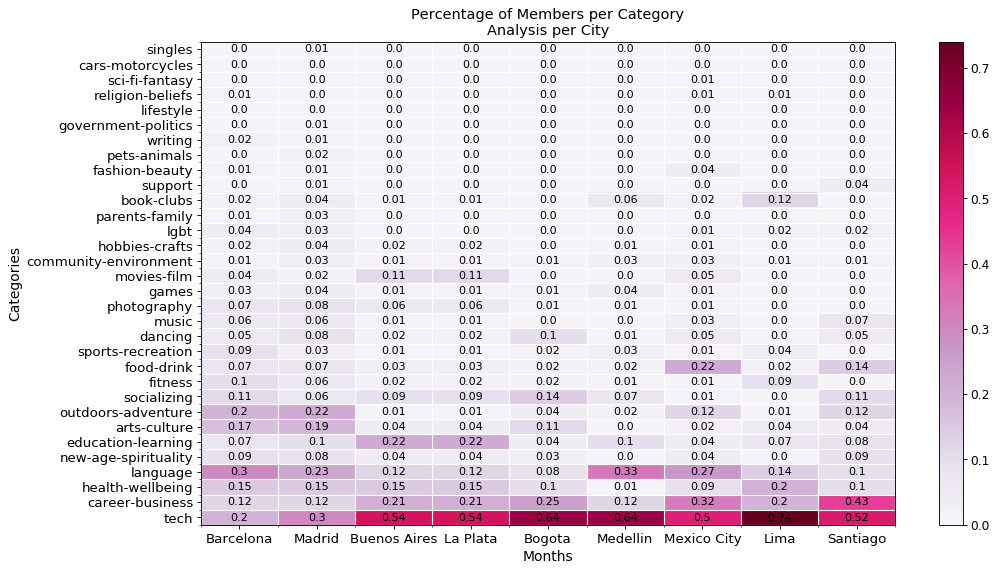

TOTALES
ORGANIZERS
2585
MEMBERS
186372


In [19]:
total_OR=[]
total_ME=[]
data_forHeatmapOrg=[]
toRowsOrg=[] #this is going to save the rows extracted per city but then, they must be transformed to column
data_forHeatmapMem=[]
toRowsMem=[]

for c in cities:
    print(c)
    categ_groupTuples=load_json('baseline_graphs/'+c+'/tuples_perCat')
    total_org=[]
    total_mem=[]
    totalOrg_perCat={} ## to save the total number of groups in the given category in the city
    totalMem_perCat={} ## to save the total number of groups in the given category in the city
    
    for cat in categ_names:
        the_tuples=categ_groupTuples[cat]
        source=list(set([x for (x,y) in the_tuples]))  # total members (unique)
        total_ME+=source  #acumulador total
        total_mem+=source  #acumulador total pero para la ciudad
        
        destin=list(set([y for (x,y) in the_tuples]))   #total creators (unique)
        total_OR+=destin
        total_org+=destin
        
        total_ME+=[x for (x,y) in the_tuples]
        #source=len(set([x for (x,y) in the_tuples]))  # total members (unique)
        #total_mem+=source
        total_OR+=[y for (x,y) in the_tuples]
        #destin=len(set([y for (x,y) in the_tuples]))   #total creators (unique)
        #total_org+=destin
        
        totalOrg_perCat[cat]=len(destin)
        totalMem_perCat[cat]=len(source)
        
    toRowsOrg.append([round(totalOrg_perCat[key]/len(set(total_org)),2)
                      for key in totalOrg_perCat.keys()])
    toRowsMem.append([round(totalMem_perCat[key]/len(set(total_mem)),2)
                      for key in totalMem_perCat.keys()])
data_forHeatmapOrg=[list(i) for i in zip(*toRowsOrg)]
data_forHeatmapMem=[list(i) for i in zip(*toRowsMem)]

draw_heatmap(cities, categ_names, data_forHeatmapOrg, 'Analysis per City', 100, 'Percentage of Organizers per Category\n')
draw_heatmap(cities, categ_names, data_forHeatmapMem, 'Analysis per City', 100, 'Percentage of Members per Category\n')
    
print('TOTALES')
print('ORGANIZERS')
print(len(set(total_OR)))
print('MEMBERS')
print(len(set(total_ME)))
    